In [ ]:
# https://pmc.ncbi.nlm.nih.gov/articles/pmid/38159571/
# https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE225503

In [40]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [41]:
adata = sc.read_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/mouse_apoe/GSE225503_adapoe.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 30868 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'age', 'percent.mt', 'miQC.probability', 'miQC.keep', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.1.4', 'seurat_clusters', 'genotype', 'clust_id', 'microglia', 'subclust_id'
    var: '_index', 'features'
    obsm: 'X_umap'

In [5]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,age,percent.mt,miQC.probability,miQC.keep,nCount_SCT,nFeature_SCT,integrated_snn_res.1.4,seurat_clusters,genotype,clust_id,microglia,subclust_id
E2_10wk_AAACCTGAGAATTCCC-1,0,5261.0,2042,3834.0,3,0,1.254514,0.057123,keep,4234.0,2024,17,17,0,Macrophages,0,29
E2_10wk_AAACCTGAGCTCCTCT-1,0,3718.0,1819,468.0,3,0,0.564820,0.040712,keep,3673.0,1816,13,13,0,Microglia,1,1
E2_10wk_AAACCTGAGTTACCCA-1,0,2364.0,1370,444.0,3,0,1.184433,0.048532,keep,2871.0,1368,3,3,0,Microglia,1,9
E2_10wk_AAACCTGCAATAAGCA-1,0,3553.0,1876,342.0,3,0,0.619195,0.037868,keep,3551.0,1875,3,3,0,Microglia,1,5
E2_10wk_AAACCTGCAGCCACCA-1,0,3512.0,1816,384.0,3,0,1.167426,0.058468,keep,3510.0,1814,13,13,0,Microglia,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E4_2yr_TTTGATCTCATCTCTA-1,7,532.0,412,0.0,0,2,0.563910,0.105982,keep,612.0,410,26,26,2,F13a1+ Monocytes,0,26
E4_2yr_TTTGGAGCAAACGAGC-1,7,801.0,514,0.0,0,2,0.374532,0.113155,keep,799.0,511,2,2,2,Microglia,1,15
E4_2yr_TTTGGAGTCGAGTCTA-1,7,502.0,378,0.0,0,2,0.199203,0.103129,keep,620.0,378,24,24,2,Activated NK Cells,0,34
E4_2yr_TTTGGTTAGTTTGCTG-1,7,531.0,387,0.0,0,2,0.564972,0.107074,keep,637.0,386,3,3,2,Microglia,1,15


In [14]:
adata.X.data

array([1., 1., 1., ..., 7., 5., 2.])

In [9]:
adata.obs['orig.ident'] = adata.obs['orig.ident'].astype('str')

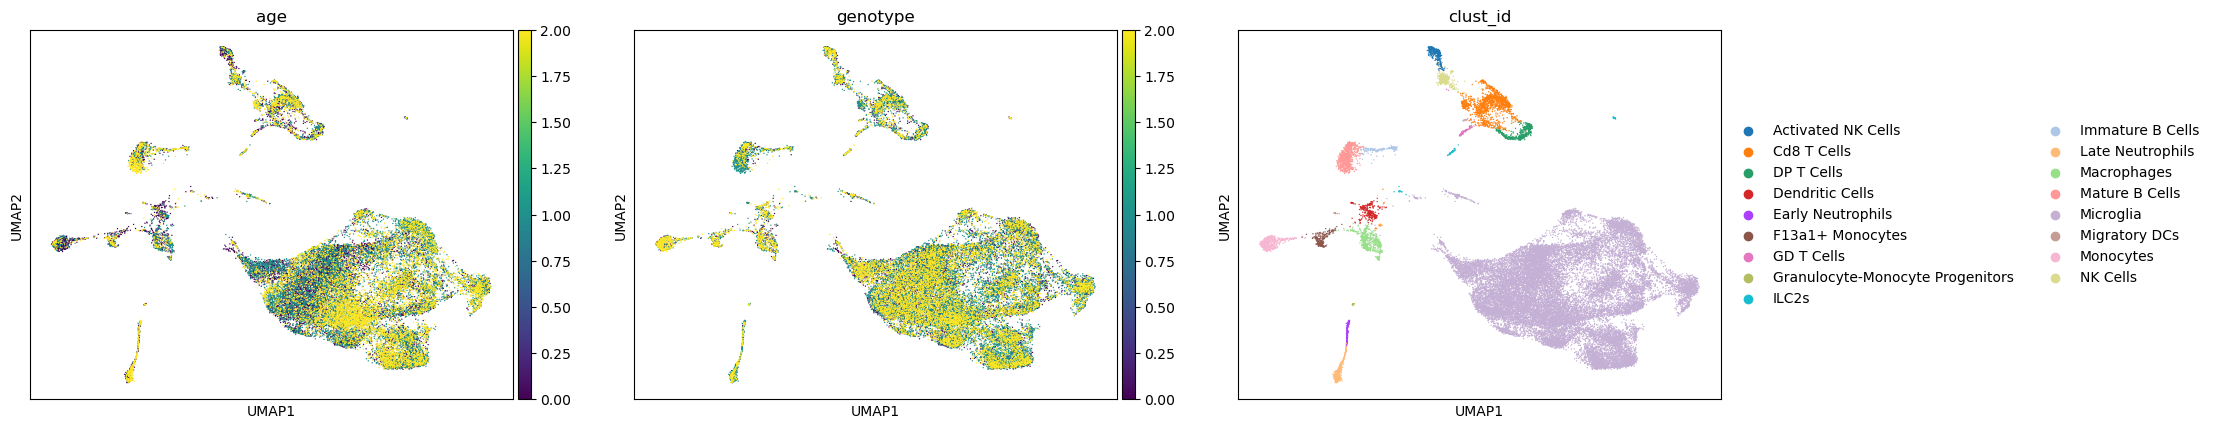

In [7]:
sc.pl.umap(adata, color = ['age', 'genotype', 'clust_id'])

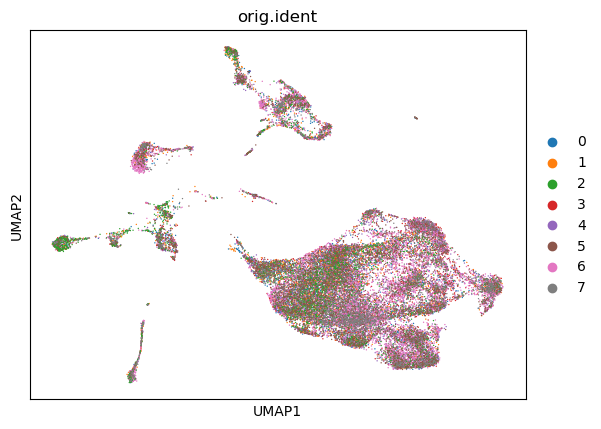

In [10]:
sc.pl.umap(adata, color = ['orig.ident'])

In [42]:
microglia_df = pd.read_csv("/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/mouse_apoe/microglia_cluster.csv")
merged = pd.merge(adata.obs, microglia_df[['Unnamed: 0', 'mglia_ident']], left_index = True, right_on = 'Unnamed: 0', how = 'outer')
merged.index = adata.obs.index
merged['fine_cluster'] = merged['mglia_ident'].fillna(merged['clust_id'])
merged.drop(columns = ['Unnamed: 0', 'mglia_ident'], inplace = True)
# adata.obs = merged

In [43]:
merged

,orig.ident,nCount_RNA,nFeature_RNA,nCount_HTO,nFeature_HTO,age,percent.mt,miQC.probability,miQC.keep,nCount_SCT,nFeature_SCT,integrated_snn_res.1.4,seurat_clusters,genotype,clust_id,microglia,subclust_id,fine_cluster
E2_10wk_AAACCTGAGAATTCCC-1,0,5261.0,2042,3834.0,3,0,1.254514,0.057123,keep,4234.0,2024,17,17,0,Macrophages,0,29,Macrophages
E2_10wk_AAACCTGAGCTCCTCT-1,0,3718.0,1819,468.0,3,0,0.564820,0.040712,keep,3673.0,1816,13,13,0,Microglia,1,1,Lars2-mid Homeostatic Microglia
E2_10wk_AAACCTGAGTTACCCA-1,0,2364.0,1370,444.0,3,0,1.184433,0.048532,keep,2871.0,1368,3,3,0,Microglia,1,9,DAM-2
E2_10wk_AAACCTGCAATAAGCA-1,0,3553.0,1876,342.0,3,0,0.619195,0.037868,keep,3551.0,1875,3,3,0,Microglia,1,5,Hspa1+ Stressed Microglia
E2_10wk_AAACCTGCAGCCACCA-1,0,3512.0,1816,384.0,3,0,1.167426,0.058468,keep,3510.0,1814,13,13,0,Microglia,1,0,Homeostatic Microglia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E4_2yr_TTTGATCTCATCTCTA-1,7,532.0,412,0.0,0,2,0.563910,0.105982,keep,612.0,410,26,26,2,F13a1+ Monocytes,0,26,F13a1+ Monocytes
E4_2yr_TTTGGAGCAAACGAGC-1,7,801.0,514,0.0,0,2,0.374532,0.113155,keep,799.0,511,2,2,2,Microglia,1,15,Effector-lo TIMs
E4_2yr_TTTGGAGTCGAGTCTA-1,7,502.0,378,0.0,0,2,0.199203,0.103129,keep,620.0,378,24,24,2,Activated NK Cells,0,34,Activated NK Cells
E4_2yr_TTTGGTTAGTTTGCTG-1,7,531.0,387,0.0,0,2,0.564972,0.107074,keep,637.0,386,3,3,2,Microglia,1,15,Effector-lo TIMs


In [35]:
adata.obs = merged

In [36]:
adata

AnnData object with n_obs × n_vars = 30868 × 32285
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'age', 'percent.mt', 'miQC.probability', 'miQC.keep', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.1.4', 'seurat_clusters', 'genotype', 'clust_id', 'microglia', 'subclust_id', 'fine_cluster'
    var: '_index', 'features'
    uns: 'clust_id_colors', 'orig.ident_colors'
    obsm: 'X_umap'

In [38]:
adata.var.

,_index,features
0,Xkr4,Xkr4
1,Gm1992,Gm1992
2,Gm19938,Gm19938
3,Gm37381,Gm37381
4,Rp1,Rp1
...,...,...
32280,AC124606.1,AC124606.1
32281,AC133095.2,AC133095.2
32282,AC133095.1,AC133095.1
32283,AC234645.1,AC234645.1


In [37]:
adata.write_h5ad('/lustre/groups/ml01/projects/2024_microglia_zihe.zheng/mouse_apoe/GSE225503_adapoe.h5ad')

ValueError: '_index' is a reserved name for dataframe columns.